In [1]:
# Task 1: Data Preprocessing

In [2]:
#import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#Load the User_Modeling_Dataset

User_data = pd.read_csv("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv")


In [4]:
User_data.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [5]:
User_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [6]:
User_data.rename(columns={' UNS': 'UNS'}, inplace=True)

In [7]:
User_data.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

In [8]:
User_data.duplicated().any()

False

In [9]:
User_data['UNS'].unique()

array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

In [10]:
#To change the values 'very_low' and 'Very Low' in the 'UNS' column to 'Very Low'
User_data['UNS'] = User_data['UNS'].replace(['very_low', 'Very Low'], 'Very Low')

In [11]:
User_data['UNS'].unique()

array(['Very Low', 'High', 'Low', 'Middle'], dtype=object)

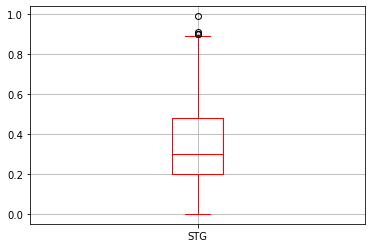

In [12]:
#Outliers

#age column
User_data.boxplot("STG", color = "red" )
plt.show()

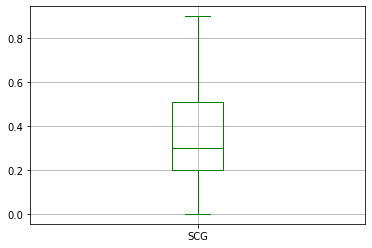

In [13]:
User_data.boxplot("SCG", color = "green" )
plt.show()

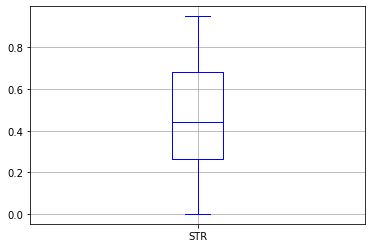

In [14]:
User_data.boxplot("STR", color = "blue" )
plt.show()

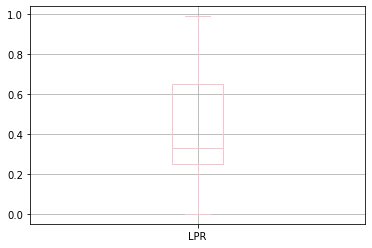

In [15]:
User_data.boxplot("LPR", color = "pink" )
plt.show()

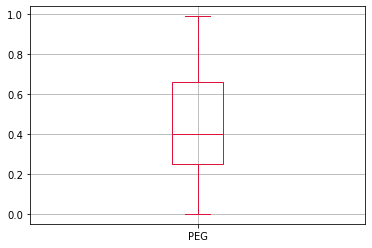

In [16]:
User_data.boxplot("PEG", color = "crimson" )
plt.show()

In [17]:
#checking for any missing values
missing_values = User_data[['STG', 'SCG', 'LPR', 'PEG','STR']].isnull().sum()
print(missing_values)

STG    0
SCG    0
LPR    0
PEG    0
STR    0
dtype: int64


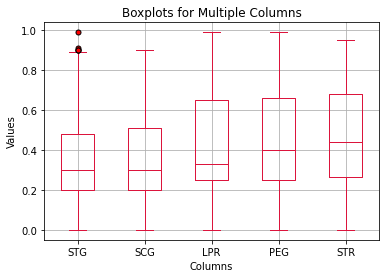

In [18]:
columns = ['STG', 'SCG', 'LPR', 'PEG', 'STR']

User_data[columns].boxplot(color='crimson', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5}, showcaps = True)

# Set title and labels
plt.title('Boxplots for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

In [19]:
User_data.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,Very Low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [20]:
columns = ['STG', 'SCG', 'LPR', 'PEG', 'STR']

# Check if all columns have observation = 0
all_zero_rows = User_data[columns].eq(0).all(axis=1)

# Remove rows with all zeros
User_data = User_data[~all_zero_rows]

In [21]:
User_data.head(10)

,STG,SCG,STR,LPR,PEG,UNS
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,Very Low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High
10,0.18,0.18,0.55,0.30,0.81,High


In [22]:
User_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 1 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     402 non-null    float64
 1   SCG     402 non-null    float64
 2   STR     402 non-null    float64
 3   LPR     402 non-null    float64
 4   PEG     402 non-null    float64
 5   UNS     402 non-null    object 
dtypes: float64(5), object(1)
memory usage: 22.0+ KB


In [23]:
# Task 2: Data Exploration 

Column: STG
count    402.000000
mean       0.354020
std        0.211546
min        0.000000
25%        0.200000
50%        0.302500
75%        0.480000
max        0.990000
Name: STG, dtype: float64


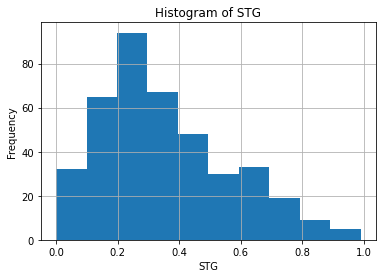

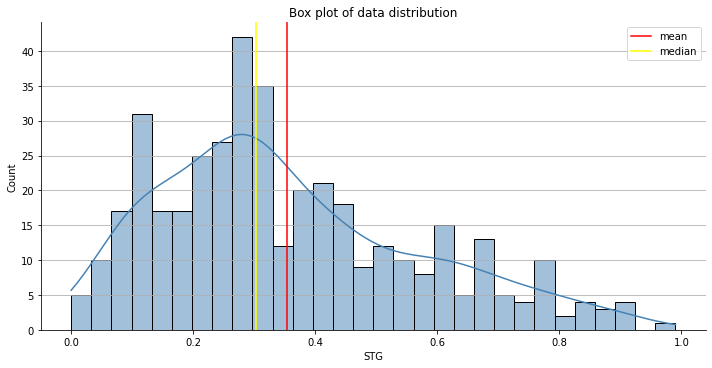

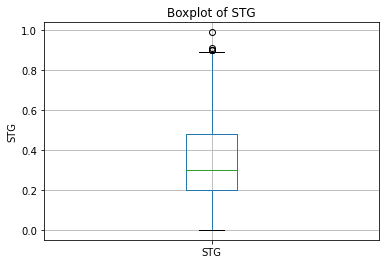



Column: SCG
count    402.000000
mean       0.356826
std        0.215064
min        0.000000
25%        0.200000
50%        0.300000
75%        0.510000
max        0.900000
Name: SCG, dtype: float64


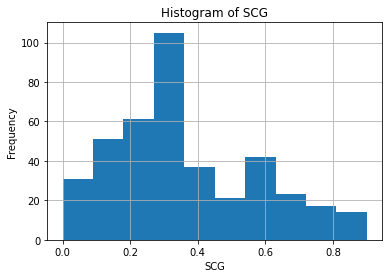

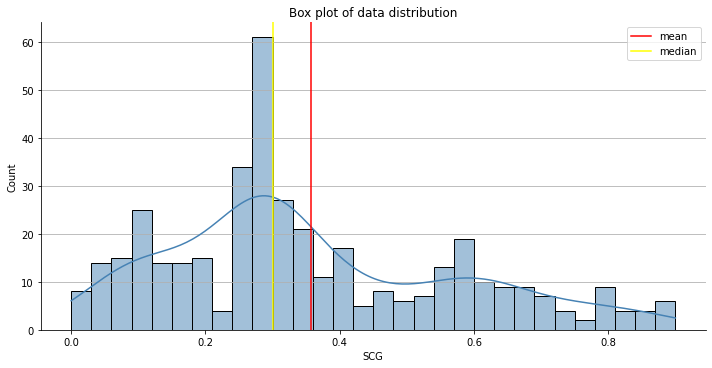

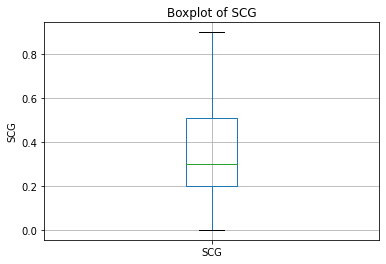



Column: STR
count    402.000000
mean       0.458794
std        0.245929
min        0.010000
25%        0.270000
50%        0.445000
75%        0.680000
max        0.950000
Name: STR, dtype: float64


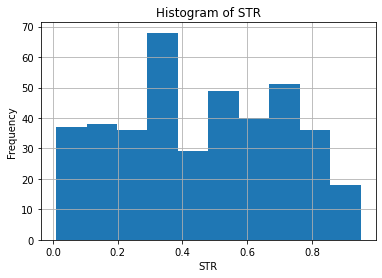

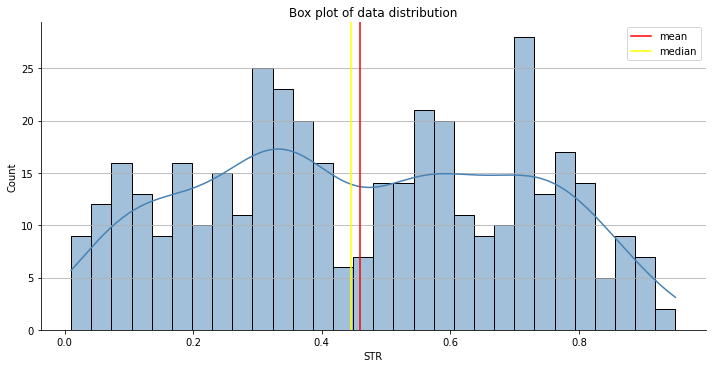

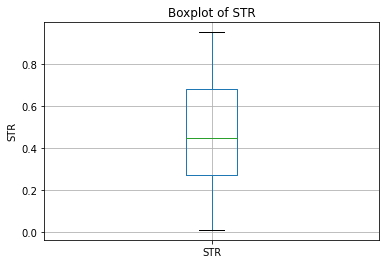



Column: LPR
count    402.000000
mean       0.432415
std        0.256962
min        0.000000
25%        0.250000
50%        0.330000
75%        0.650000
max        0.990000
Name: LPR, dtype: float64


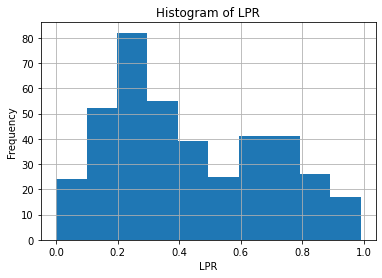

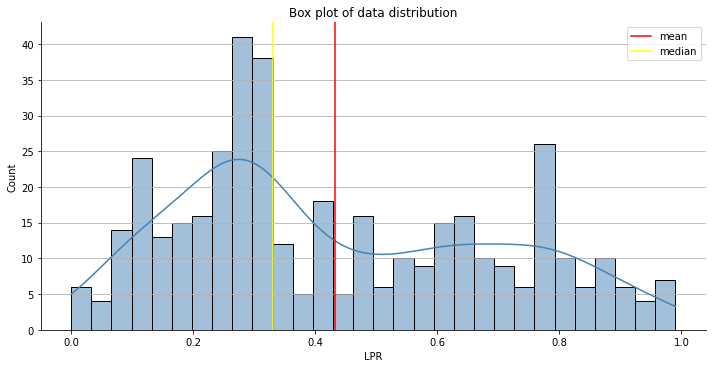

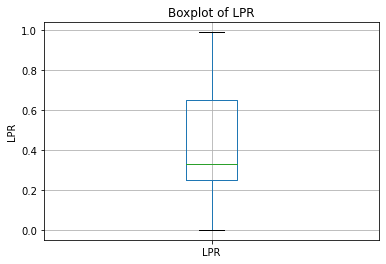



Column: PEG
count    402.000000
mean       0.457495
std        0.266131
min        0.000000
25%        0.250000
50%        0.400000
75%        0.660000
max        0.990000
Name: PEG, dtype: float64


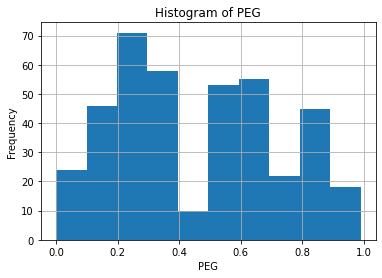

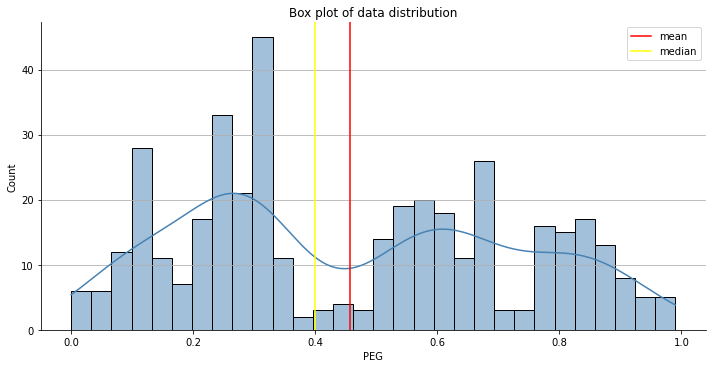

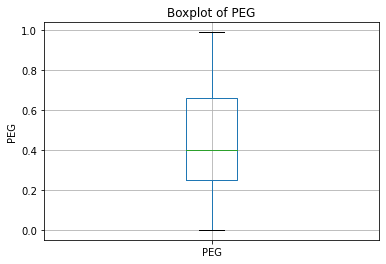

In [40]:
# Assuming your DataFrame is named 'User_data'
columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

# Explore each column except 'UNS'
for col in columns:
    print(f"Column: {col}")
    
    # Descriptive Statistics
    print(User_data[col].describe())
    
    # Histogram
    User_data[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot
    sns.displot(User_data[col], bins = 30, kde = True, color = "steelblue", height = 5, aspect = 2)
    plt.axvline(x = np.mean(User_data[col]),color = 'red',label = 'mean')
    plt.axvline(x = np.median(User_data[col]),color = "yellow",label = "median")
    plt.legend(loc = "upper right")
    plt.title("Box plot of data distribution")
    plt.grid(axis = "y")
    plt.show()
    
    
    
    
    User_data.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()
    
    print("\n")



Column: UNS
count     402
unique      4
top       Low
freq      129
Name: UNS, dtype: object


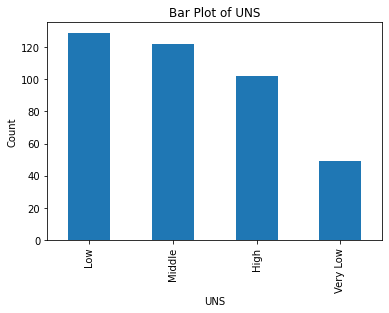

In [25]:
# Explore 'UNS' column separately
col = 'UNS'
print(f"Column: {col}")

# Descriptive Statistics
print(User_data[col].describe())

# Bar plot
value_counts = User_data[col].value_counts()
value_counts.plot(kind='bar')
plt.title(f"Bar Plot of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


In [26]:
# Data Exploration 2.2


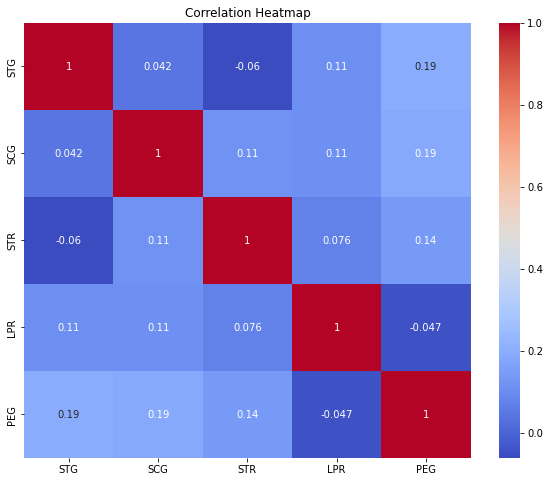

          STG       SCG       STR       LPR       PEG
STG  1.000000  0.042454 -0.060060  0.107749  0.192895
SCG  0.042454  1.000000  0.114476  0.113603  0.187845
STR -0.060060  0.114476  1.000000  0.076268  0.141548
LPR  0.107749  0.113603  0.076268  1.000000 -0.046762
PEG  0.192895  0.187845  0.141548 -0.046762  1.000000


In [27]:

columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

# Compute the correlation matrix
correlation_matrix = User_data[columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix)


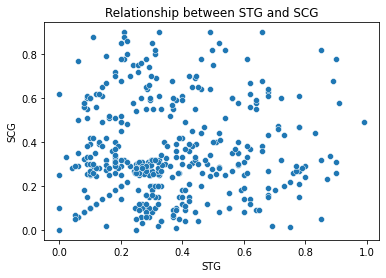

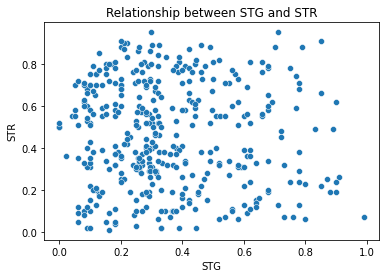

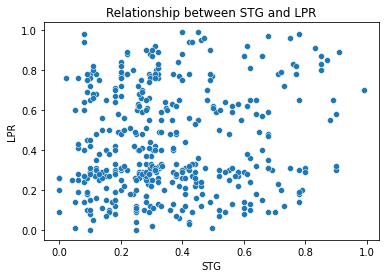

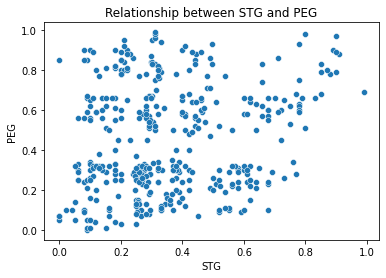

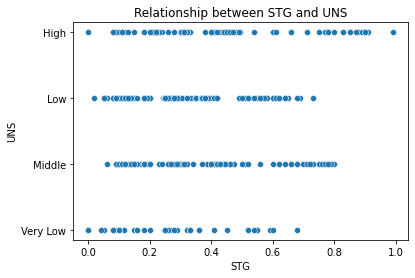

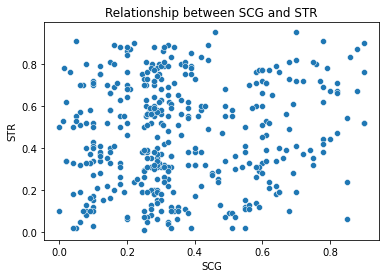

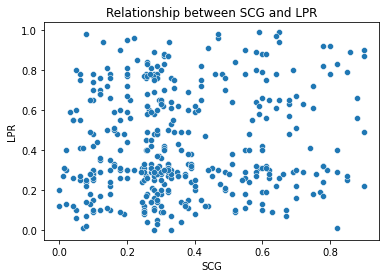

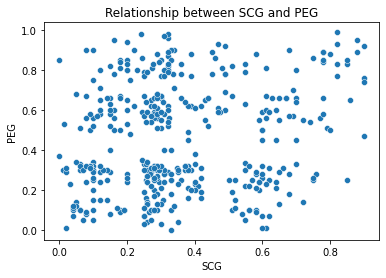

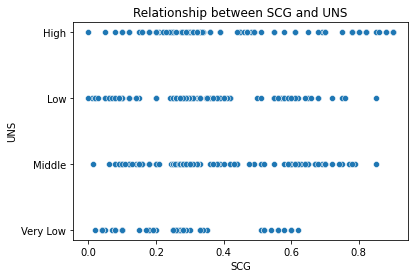

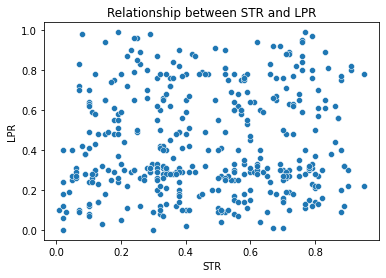

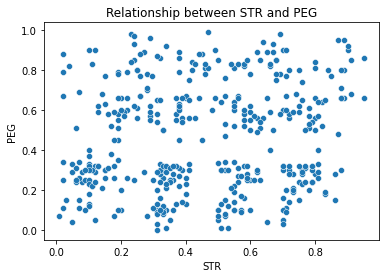

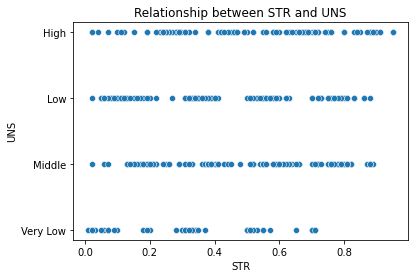

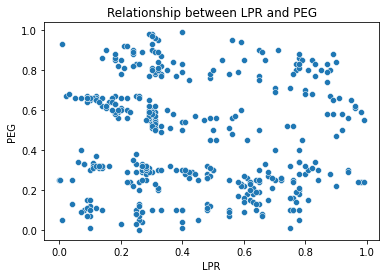

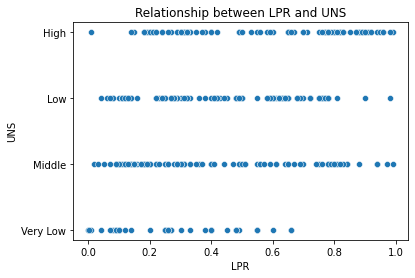

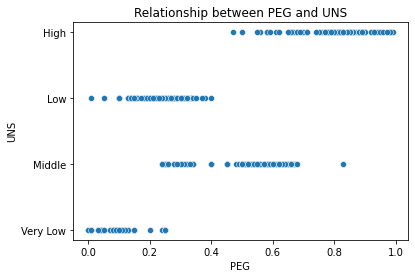

In [28]:
columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']

# Generate visualizations for each pair of attributes
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        attribute1 = columns[i]
        attribute2 = columns[j]
        
        # Scatter plot
        sns.scatterplot(data=User_data, x=attribute1, y=attribute2)
        plt.title(f"Relationship between {attribute1} and {attribute2}")
        plt.xlabel(attribute1)
        plt.ylabel(attribute2)
        plt.show()
        
        # Add your observations about the relationship between the attributes based on the visualization
        
        print("\n")


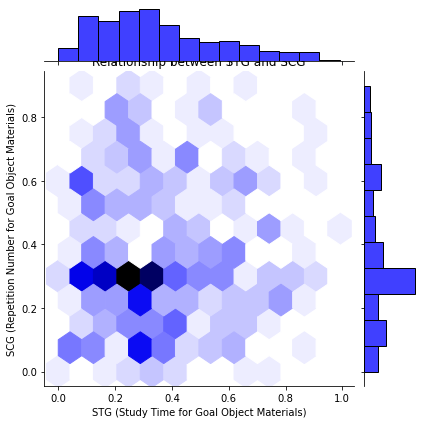

In [29]:

STG = User_data['STG']
SCG = User_data['SCG']

# Create a joint plot
sns.jointplot(x=STG, y=SCG, kind='hex', color='blue')
plt.xlabel('STG (Study Time for Goal Object Materials)')
plt.ylabel('SCG (Repetition Number for Goal Object Materials)')
plt.title('Relationship between STG and SCG')
plt.show()


In [30]:
from scipy.stats import pearsonr

STG = User_data['STG']
SCG = User_data['SCG']

# Perform a Pearson correlation test
correlation, p_value = pearsonr(STG, SCG)

# Set the significance level
alpha = 0.05

# Check the direction of the correlation
if correlation > 0:
    hypothesis = "There is a significant positive correlation between STG and SCG."
elif correlation < 0:
    hypothesis = "There is a significant negative correlation between STG and SCG."
else:
    hypothesis = "There is no significant correlation between STG and SCG."

# Check if the correlation is statistically significant
if p_value < alpha:
    significance = "The correlation is statistically significant (p < 0.05)."
else:
    significance = "The correlation is not statistically significant (p >= 0.05)."

# Print the results
print(hypothesis)
print(significance)


There is a significant positive correlation between STG and SCG.
The correlation is not statistically significant (p >= 0.05).


In [31]:
import scipy.stats as stats

STG = User_data['STG']
PEG = User_data['PEG']

# Set the significance level
alpha = 0.05

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(STG, PEG)

# Check the direction of the correlation
if correlation > 0:
    hypothesis = "There is a significant positive relationship between STG and PEG."
elif correlation < 0:
    hypothesis = "There is a significant negative relationship between STG and PEG."
else:
    hypothesis = "There is no significant relationship between STG and PEG."

# Check if the correlation is statistically significant
if p_value < alpha:
    significance = "The relationship is statistically significant (p < 0.05)."
else:
    significance = "The relationship is not statistically significant (p >= 0.05)."

# Print the results
print(hypothesis)
print(significance)


There is a significant positive relationship between STG and PEG.
The relationship is statistically significant (p < 0.05).


In [32]:
import scipy.stats as stats

SCG = User_data['SCG']
STR = User_data['STR']

# Set the significance level
alpha = 0.05

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(SCG, STR)

# Check the direction of the correlation
if correlation > 0:
    hypothesis = "There is a significant positive relationship between STG and PEG."
elif correlation < 0:
    hypothesis = "There is a significant negative relationship between STG and PEG."
else:
    hypothesis = "There is no significant relationship between STG and PEG."

# Check if the correlation is statistically significant
if p_value < alpha:
    significance = "The relationship is statistically significant (p < 0.05)."
else:
    significance = "The relationship is not statistically significant (p >= 0.05)."

# Print the results
print(hypothesis)
print(significance)


There is a significant positive relationship between STG and PEG.
The relationship is statistically significant (p < 0.05).


In [33]:
import scipy.stats as stats

SCG = User_data['SCG']
PEG = User_data['PEG']

# Set the significance level
alpha = 0.05

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(SCG, PEG)

# Check the direction of the correlation
if correlation > 0:
    hypothesis = "There is a significant positive relationship between STG and PEG."
elif correlation < 0:
    hypothesis = "There is a significant negative relationship between STG and PEG."
else:
    hypothesis = "There is no significant relationship between STG and PEG."

# Check if the correlation is statistically significant
if p_value < alpha:
    significance = "The relationship is statistically significant (p < 0.05)."
else:
    significance = "The relationship is not statistically significant (p >= 0.05)."

# Print the results
print(hypothesis)
print(significance)

There is a significant positive relationship between STG and PEG.
The relationship is statistically significant (p < 0.05).


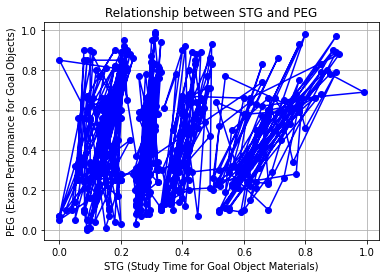

In [34]:
import matplotlib.pyplot as plt

STG = User_data['STG']
PEG = User_data['PEG']

# Create a line plot
plt.plot(STG, PEG, color='blue', marker='o')
plt.xlabel('STG (Study Time for Goal Object Materials)')
plt.ylabel('PEG (Exam Performance for Goal Objects)')
plt.title('Relationship between STG and PEG')
plt.grid(True)
plt.show()


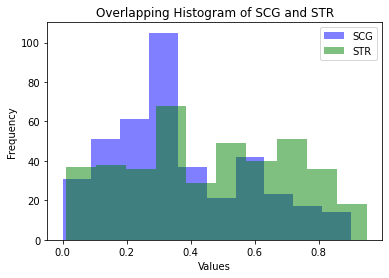

In [35]:
import matplotlib.pyplot as plt

SCG = User_data['SCG']
STR = User_data['STR']

# Create overlapping histograms
plt.hist(SCG, bins=10, alpha=0.5, label='SCG', color='blue')
plt.hist(STR, bins=10, alpha=0.5, label='STR', color='green')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Overlapping Histogram of SCG and STR')
plt.legend()
plt.show()


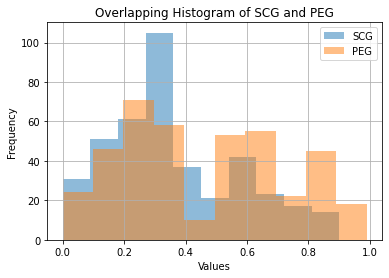

In [36]:
import matplotlib.pyplot as plt

SCG = User_data['SCG']
PEG = User_data['PEG']

# Create overlapping histograms
plt.hist(SCG, bins=10, alpha=0.5, label='SCG')
plt.hist(PEG, bins=10, alpha=0.5, label='PEG')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Overlapping Histogram of SCG and PEG')
plt.legend()
plt.grid(True)
plt.show()


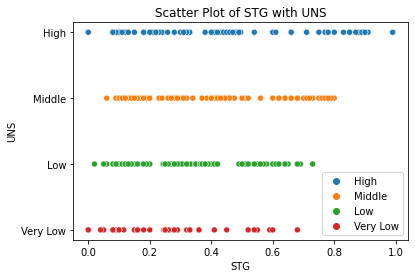

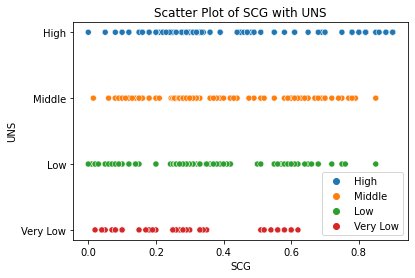

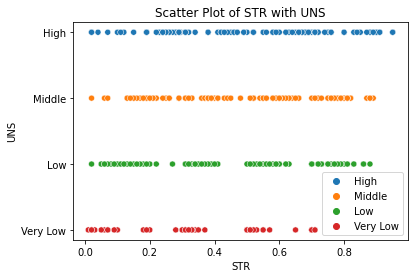

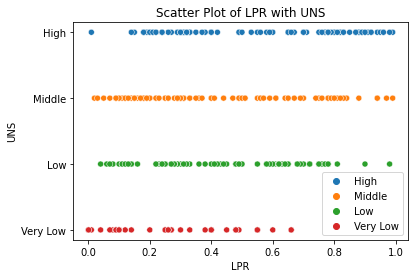

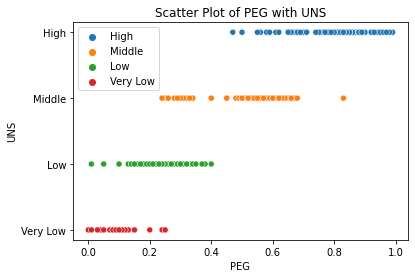

In [37]:
import seaborn as sns
import pandas as pd

STG = User_data['STG']
SCG = User_data['SCG']
STR = User_data['STR']
LPR = User_data['LPR']
PEG = User_data['PEG']
UNS = User_data['UNS']

# Define the order of UNS attributes
uns_order = ['High', 'Middle', 'Low', 'Very Low']

# Convert UNS column to ordered categorical data type
UNS = pd.Categorical(UNS, categories=uns_order, ordered=True)

# Create a scatter plot for each variable with UNS
sns.scatterplot(x=STG, y=UNS, hue=UNS, marker='o')
plt.xlabel('STG')
plt.ylabel('UNS')
plt.title('Scatter Plot of STG with UNS')
plt.show()

sns.scatterplot(x=SCG, y=UNS, hue=UNS, marker='o')
plt.xlabel('SCG')
plt.ylabel('UNS')
plt.title('Scatter Plot of SCG with UNS')
plt.show()

sns.scatterplot(x=STR, y=UNS, hue=UNS, marker='o')
plt.xlabel('STR')
plt.ylabel('UNS')
plt.title('Scatter Plot of STR with UNS')
plt.show()

sns.scatterplot(x=LPR, y=UNS, hue=UNS, marker='o')
plt.xlabel('LPR')
plt.ylabel('UNS')
plt.title('Scatter Plot of LPR with UNS')
plt.show()

sns.scatterplot(x=PEG, y=UNS, hue=UNS, marker='o')
plt.xlabel('PEG')
plt.ylabel('UNS')
plt.title('Scatter Plot of PEG with UNS')
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = User_data[['STG', 'SCG', 'STR', 'PEG']]
target = User_data['UNS']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[17  0  7  0]
 [ 0 22  1  0]
 [ 0  3 23  0]
 [ 0  4  0  4]]
              precision    recall  f1-score   support

        High       1.00      0.71      0.83        24
         Low       0.76      0.96      0.85        23
      Middle       0.74      0.88      0.81        26
    Very Low       1.00      0.50      0.67         8

    accuracy                           0.81        81
   macro avg       0.88      0.76      0.79        81
weighted avg       0.85      0.81      0.81        81

Accuracy: 0.8148148148148148


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = User_data[['STG', 'SCG', 'STR', 'PEG']]
target = User_data['UNS']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier(random_state=42, criterion = 'entropy', min_samples_split=36, min_samples_leaf= 2,max_features = 4,max_leaf_nodes = 16)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dt.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[18  0  6  0]
 [ 0 21  1  1]
 [ 0  2 24  0]
 [ 0  1  0  7]]
              precision    recall  f1-score   support

        High       1.00      0.75      0.86        24
         Low       0.88      0.91      0.89        23
      Middle       0.77      0.92      0.84        26
    Very Low       0.88      0.88      0.88         8

    accuracy                           0.86        81
   macro avg       0.88      0.87      0.87        81
weighted avg       0.88      0.86      0.86        81

Accuracy: 0.8641975308641975
